In [1]:
# Code Cell 화면 꽉 채우기

from IPython.core.display import display, HTML 

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#한글 폰트 설정

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf' #Fonts dir에 인식되지 않는 경우가 문제 발생 원인, 다시 시작해서 인식시켜 보자.
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pwd

'C:\\Users\\jjc12\\Desktop\\학교전공자료\\졸업논문\\사회환경공학\\졸업논문\\3차회의'

출처
1. 에어코리아 : https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123

2. 기상자료개방포털 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

**주의: 에어코리아는 당일 포함 기간 설정 2/28, 기상자료개방포털은 당일 포함하지 않고 3/1까지로 출력!**

> **미세먼지 데이터 (서울 거점 평균 시간별 농도 )**
===
>> 2017-2021/12-02 : 5개년 겨울철 데이터

In [8]:
df_12 = pd.read_excel('./data/2017/fd/2016_12_fd.xls')
df_1 = pd.read_excel('./data/2017/fd/2017_01_fd.xls')
df_2 = pd.read_excel('./data/2017/fd/2017_02_fd.xls')

In [9]:
df_12.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [10]:
df_1.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [11]:
df_2.drop(['시도','측정소명', '측정소코드', '아황산가스', '일산화탄소', '오존', '이산화질소'], axis= 1, inplace = True)

In [12]:
#거점별 미세먼지 농도 평균내기

df_12 = df_12.groupby('날짜').mean() 
df_1 = df_1.groupby('날짜').mean()
df_2 = df_2.groupby('날짜').mean()

In [14]:
df_12.shape, df_1.shape, df_2.shape

((744, 2), (744, 2), (672, 2))

In [15]:
df_fd = pd.concat([df_12, df_1, df_2], axis = 0) #744+744+672 = 2160 확인!
df_fd.head()

,PM10,PM2.5
날짜,,
2016-12-01 01,35.583333,22.608696
2016-12-01 02,50.416667,30.291667
2016-12-01 03,68.083333,39.791667
2016-12-01 04,90.291667,52.666667
2016-12-01 05,108.916667,58.625000


In [16]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 2016-12-01 01 to 2017-02-28 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    2160 non-null   float64
 1   PM2.5   2160 non-null   float64
dtypes: float64(2)
memory usage: 50.6+ KB


In [17]:
df_fd.describe()

,PM10,PM2.5
count,2160.000000,2160.000000
mean,49.028114,30.172049
std,24.440160,17.365981
min,5.681818,3.086957
25%,32.480000,17.280000
50%,43.673333,26.875000
75%,58.883523,38.030000
max,218.560000,115.520000


> > ## 5개년 PM2.5 농도 데이터 합치기

In [18]:
df_21_fd = pd.read_csv('./data/2021/2021_12_2_fd.csv')
df_20_fd = pd.read_csv('./data/2020/2020_12_2_fd.csv')
df_19_fd = pd.read_csv('./data/2019/2019_12_2_fd.csv')
df_18_fd = pd.read_csv('./data/2018/2018_12_2_fd.csv')
df_17_fd = pd.read_csv('./data/2017/2017_12_2_fd.csv')

In [19]:
df_21_fd = df_21_fd.rename(columns={'PM2.5':'21_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_20_fd = df_20_fd.rename(columns={'PM2.5':'20_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_19_fd = df_19_fd.rename(columns={'PM2.5':'19_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_18_fd = df_18_fd.rename(columns={'PM2.5':'18_PM2.5'}).drop(['날짜', 'PM10'], axis =1)
df_17_fd = df_17_fd.rename(columns={'PM2.5':'17_PM2.5'}).drop(['날짜', 'PM10'], axis =1)

In [84]:
df_17_21 = pd.concat([df_21, df_20, df_19, df_18, df_17], axis=1)
# df_17_21.to_csv('./data/2017_21_12_2_fd.csv', encoding='utf-8-sig')

In [227]:
# df_17_21_fd = df_17_21
df_17_21_fd

,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
0,22.720,22.083333,18.28,11.00,22.608696
1,21.520,20.250000,17.72,10.68,30.291667
2,20.280,19.875000,18.88,10.76,39.791667
3,19.120,19.541667,19.64,10.16,52.666667
4,19.375,20.333333,19.16,9.60,58.625000
...,...,...,...,...,...
2179,NaN,16.960000,NaN,NaN,NaN
2180,NaN,19.120000,NaN,NaN,NaN
2181,NaN,19.600000,NaN,NaN,NaN
2182,NaN,20.640000,NaN,NaN,NaN


> **풍속, 풍향과 기온 데이터 (서울 시간별 데이터)**
===
> > ## 서, 북 풍향 마스킹하고 범주화 
> > - 서풍: 225-315 -> 0/ 북풍: 315-45 -> 1/ 남동풍: 45-225 -> 2 (이상, 미만)

In [163]:
# df_21_wd = pd.read_csv('./data/2021/2021_12_2_wdir.csv', encoding='CP949')
df_20_wd = pd.read_csv('./data/2020/2020_12_2_wdir.csv', encoding='CP949')
# df_19_wd = pd.read_csv('./data/2019/2019_12_2_wdir.csv', encoding='CP949')
# df_18_wd = pd.read_csv('./data/2018/2018_12_2_wdir.csv', encoding='CP949')
# df_17_wd = pd.read_csv('./data/2017/2017_12_2_wdir.csv', encoding='CP949')

In [144]:
df_21_wd['sort_21WD'].value_counts()

0    1110
2     691
1     357
Name: sort_21WD, dtype: int64

In [135]:
df_20_wd['sort_20WD'].value_counts()

0    793
2    758
1    628
Name: sort_20WD, dtype: int64

In [140]:
df_19_wd['sort_19WD'].value_counts()

0    1078
1     723
2     357
Name: sort_19WD, dtype: int64

In [148]:
df_18_wd['sort_18WD'].value_counts()

0    1094
1     709
2     333
Name: sort_18WD, dtype: int64

In [152]:
df_17_wd['sort_17WD'].value_counts()

0    1174
1     573
2     413
Name: sort_17WD, dtype: int64

In [170]:
#풍향 마스킹

# df_20_wd = df_20_wd.rename(columns={'풍향(16방위)':'20_WD'}).drop(['지점명', '지점'], axis =1)
# df_20_wd['sort_20WD'] = pd.cut(df_20_wd['20_WD'], bins=[-1,45,225,315,360], labels=[1,2,0,11])
# df_20_wd['sort_20WD'] = df_20_wd['sort_20WD'].replace(11, 1)

#결측값 확인
# df_17_wd.isna().sum()

#value 별 개수 확인
# df_17_wd['sort_17WD'].value_counts()
# df_20_wd
# pd.set_option('max_r', 10)
df_17_21_wd = pd.concat([df_21_wd.drop('21_WD', axis =1), df_20_wd.drop('20_WD', axis =1), df_19_wd.drop('19_WD', axis =1), df_18_wd.drop('18_WD', axis =1), df_17_wd.drop('17_WD', axis =1)], axis =1).set_index('일시')

In [172]:
df_17_21_wd.to_csv('./data/2017_21_12_2_wd.csv', encoding='utf-8-sig')

> > ## 풍속 데이터 5개년 합치기

In [174]:
df_21_w = pd.read_csv('./data/2021/2021_12_2_wind.csv')
df_20_w = pd.read_csv('./data/2020/2020_12_2_wind.csv', encoding='CP949')
df_19_w = pd.read_csv('./data/2019/2019_12_2_wind.csv', encoding='CP949')
df_18_w = pd.read_csv('./data/2018/2018_12_2_wind.csv', encoding='CP949')
df_17_w = pd.read_csv('./data/2017/2017_12_2_wind.csv', encoding='CP949')

In [185]:
# df_21_w = df_21_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'21_W'})
# df_20_w = df_20_w.drop(['지점', '지점명'], axis =1).rename(columns={'풍속(m/s)':'20_W'})
# df_19_w = df_19_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'19_W'})
# df_18_w = df_18_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'18_W'})
# df_17_w = df_17_w.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'풍속(m/s)':'17_W'})

In [189]:
# df_17_21_w = pd.concat([df_21_w, df_20_w, df_19_w, df_18_w, df_17_w], axis =1).set_index('일시')
df_17_21_w.to_csv('./data/2017_21_12_2_w.csv', encoding='utf-8-sig')

> > ## 풍속, 풍향 일시를 기준으로 합치기

In [192]:
# df_17_21_wwd = pd.merge(df_17_21_w, df_17_21_wd,how='outer',left_index = True, right_index =True)
df_17_21_wwd

,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,,,,,,
2019-12-01 01:00,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0
2019-12-01 02:00,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0
2019-12-01 03:00,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0
2019-12-01 04:00,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0
2019-12-01 05:00,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-02-29 20:00,NaN,2.3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2020-02-29 21:00,NaN,1.3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2020-02-29 22:00,NaN,1.1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


> > ## 기온 데이터 5개년 합치기

In [193]:
df_21_t = pd.read_csv('./data/2021/2021_12_2_temp.csv')
df_20_t = pd.read_csv('./data/2020/2020_12_2_temp.csv', encoding='CP949')
df_19_t = pd.read_csv('./data/2019/2019_12_2_temp.csv', encoding='CP949')
df_18_t = pd.read_csv('./data/2018/2018_12_2_temp.csv', encoding='CP949')
df_17_t = pd.read_csv('./data/2017/2017_12_2_temp.csv', encoding='CP949')

In [195]:
df_21_t.head()

,지점,지점명,일시,기온(°C)
0,108,서울,2020-12-01 1:00,-1.4
1,108,서울,2020-12-01 2:00,-2.1
2,108,서울,2020-12-01 3:00,-2.2
3,108,서울,2020-12-01 4:00,-2.7
4,108,서울,2020-12-01 5:00,-3.2


In [196]:
# df_21_t = df_21_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'21_T'})
# df_20_t = df_20_t.drop(['지점', '지점명'], axis =1).rename(columns={'기온(°C)':'20_T'})
# df_19_t = df_19_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'19_T'})
# df_18_t = df_18_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'18_T'})
# df_17_t = df_17_t.drop(['지점', '지점명', '일시'], axis =1).rename(columns={'기온(°C)':'17_T'})

In [199]:
df_17_21_t = pd.concat([df_21_t, df_20_t, df_19_t, df_18_t, df_17_t], axis =1).set_index('일시')

In [200]:
df_17_21_t.to_csv('./data/2017_21_12_2_t.csv', encoding = 'utf-8-sig')

> > ## 기온과 풍속, 풍향을 일시를 기준으로 합치기

In [204]:
# df_17_21_twwd = pd.merge(df_17_21_t, df_17_21_wwd, how='outer', left_index = True, right_index = True)
# df_17_21_twwd.to_csv('./data/2017_21_12_2_twwd.csv', encoding = 'utf-8-sig')
df_17_21_twwd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0,0,1,1,0
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0,1,2,1,0
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0,1,1,1,0
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0,2,1,1,0
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0,1,1,0,0


> > ## 미세먼지 농도와 twwd(기온, 풍속, 풍향)을 인덱스 기준으로 합치기

In [233]:
# df_17_21_twwd.reset_index()
# df_twwd_fd = pd.merge(df_17_21_twwd.reset_index(), df_17_21_fd,how='outer',left_index=True,right_index=True).set_index('일시')
# df_twwd_fd.to_csv('./data/2017_21_12_2_twwd_fd.csv', encoding = 'utf-8-sig')

> > ## 풍속 결측값 기준, 총 데이터 결측값 제거하기

In [240]:
pd.set_option('max_r', 30)
df_twwd_fd[df_twwd_fd['21_W'].isna() == True]

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-12 21:00,1.4,-1.2,-2.1,-8.8,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400000,13.791667,19.48,17.458333,37.625000
2019-12-12 22:00,1.0,-1.2,-2.2,-9.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.040000,13.916667,18.52,16.750000,38.000000
2019-12-15 15:00,-5.2,11.0,3.2,0.1,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.136364,19.080000,36.72,65.217391,12.863636
2019-12-15 16:00,-5.0,10.5,2.6,0.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.565217,18.640000,37.25,64.166667,14.090909
2019-12-15 17:00,-6.0,9.6,1.8,-0.2,-3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318182,19.291667,39.24,62.608696,15.708333
2020-02-29 04:00,NaN,4.6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.1,NaN,1,NaN,NaN,0,NaN,17.880000,NaN,NaN,NaN
2020-02-29 05:00,NaN,4.6,NaN,NaN,NaN,NaN,0.6,NaN,NaN,1.8,NaN,1,NaN,NaN,0,NaN,18.600000,NaN,NaN,NaN
2020-02-29 06:00,NaN,4.6,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,18.720000,NaN,NaN,NaN
2020-02-29 07:00,NaN,4.5,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,18.200000,NaN,NaN,NaN


In [234]:
# 풍속 풍향 29일 이후 Nan 말고, 중간에 관측 결측값을 찾고, 제거한다.

df_twwd_fd[df_twwd_fd['20_W'].isna() == True]

# 전체 2200여개의 데이터 중 5개이므로 모델 성능을 훼손하지 않는 수준이라고 판단했다.

# 미세먼지 농도, 기온, 일시에 따른 시간대 개수 2184개인데 반해, 풍속 풍향은 아래와 같은 5개 시간의 결측값으로 인해 2179개였다.
# 그러나 놀라운 것은, 단순 관측 오류라고 보기에는 연도에 상관없이 이 5 시간대는 같은 결측값이라는 사실!
# 즉, 의도적인 결측으로 보이며, 정기 점검과 같은 의도적인 빈 값으로 보인다.
# 결국, 이 5개 시간대를 결측값으로서, 제거해주기로 한다. 

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-12 21:00,1.4,-1.2,-2.1,-8.8,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.400000,13.791667,19.48,17.458333,37.625000
2019-12-12 22:00,1.0,-1.2,-2.2,-9.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.040000,13.916667,18.52,16.750000,38.000000
2019-12-15 15:00,-5.2,11.0,3.2,0.1,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.136364,19.080000,36.72,65.217391,12.863636
2019-12-15 16:00,-5.0,10.5,2.6,0.0,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.565217,18.640000,37.25,64.166667,14.090909
2019-12-15 17:00,-6.0,9.6,1.8,-0.2,-3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318182,19.291667,39.24,62.608696,15.708333


In [236]:
twwd_fd = df_twwd_fd[df_twwd_fd['20_W'].isna() == False] #결측 5개 제거

In [237]:
twwd_fd.to_csv('./data/2017_21_12_2_twwd_fd_drna.csv', encoding = 'utf-8-sig')

> # EDA 및 데이터 기초 통계량 분석

In [24]:
twwd_fd = pd.read_csv('./data/2017_21_12_2_twwd_fd_drna.csv')
twwd_fd = twwd_fd.set_index('일시')

In [25]:
twwd_fd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0.0,0,1.0,1.0,0.0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0.0,1,2.0,1.0,0.0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0.0,1,1.0,1.0,0.0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0.0,2,1.0,1.0,0.0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0.0,1,1.0,0.0,0.0,19.375,20.333333,19.16,9.60,58.625000


In [26]:
twwd_fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2179 entries, 2019-12-01 01:00 to 2020-03-01 00:00
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   21_T       2155 non-null   float64
 1   20_T       2179 non-null   float64
 2   19_T       2155 non-null   float64
 3   18_T       2155 non-null   float64
 4   17_T       2155 non-null   float64
 5   21_W       2158 non-null   float64
 6   20_W       2179 non-null   float64
 7   19_W       2158 non-null   float64
 8   18_W       2136 non-null   float64
 9   17_W       2160 non-null   float64
 10  sort_21WD  2158 non-null   float64
 11  sort_20WD  2179 non-null   int64  
 12  sort_19WD  2158 non-null   float64
 13  sort_18WD  2136 non-null   float64
 14  sort_17WD  2160 non-null   float64
 15  21_PM2.5   2155 non-null   float64
 16  20_PM2.5   2179 non-null   float64
 17  19_PM2.5   2155 non-null   float64
 18  18_PM2.5   2155 non-null   float64
 19  17_PM2.5   2155 non-null  

In [27]:
twwd_fd.describe()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
count,2155.000000,2179.000000,2155.000000,2155.000000,2155.000000,2158.000000,2179.000000,2158.000000,2136.000000,2160.000000,2158.000000,2179.000000,2158.000000,2136.000000,2160.000000,2155.000000,2179.000000,2155.000000,2155.000000,2155.000000
mean,-0.066682,1.842542,-0.201485,-2.534710,-0.259536,2.438369,2.204956,1.821918,1.943867,2.321065,0.805839,0.983938,0.665894,0.643727,0.647685,25.610394,28.323636,32.188548,31.431597,30.187164
std,6.575629,4.673184,5.174572,5.472447,4.965247,1.189886,1.186376,1.048697,1.144362,1.233073,0.892883,0.843720,0.744041,0.735795,0.781588,17.643291,16.674970,22.294448,21.768955,17.374309
min,-18.500000,-11.700000,-14.200000,-17.800000,-12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.720000,1.739130,4.500000,4.476190,3.086957
25%,-4.900000,-1.400000,-3.700000,-6.200000,-3.800000,1.600000,1.300000,1.000000,1.000000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,12.760000,16.122500,17.816667,16.632500,17.291667
50%,0.200000,1.800000,-0.200000,-2.200000,-0.500000,2.300000,2.000000,1.600000,1.700000,2.100000,0.000000,1.000000,1.000000,0.000000,0.000000,19.960000,25.280000,25.160000,24.391304,26.875000
75%,5.000000,5.200000,2.800000,1.500000,3.300000,3.100000,2.900000,2.500000,2.700000,3.100000,2.000000,2.000000,1.000000,1.000000,1.000000,31.940000,37.960000,39.660000,38.694167,38.122500
max,17.200000,15.500000,14.100000,10.300000,13.100000,7.400000,7.400000,6.500000,6.700000,7.200000,2.000000,2.000000,2.000000,2.000000,2.000000,100.416667,118.400000,154.200000,149.920000,115.520000


> **변수별 상관성 시각화**
===
> > 데이터 합치기 : 미세먼지 농도(df_fd) + 온도/풍속(df_tw)
> > 결측값 제거 : 2개 wind에서 발생

<AxesSubplot:>

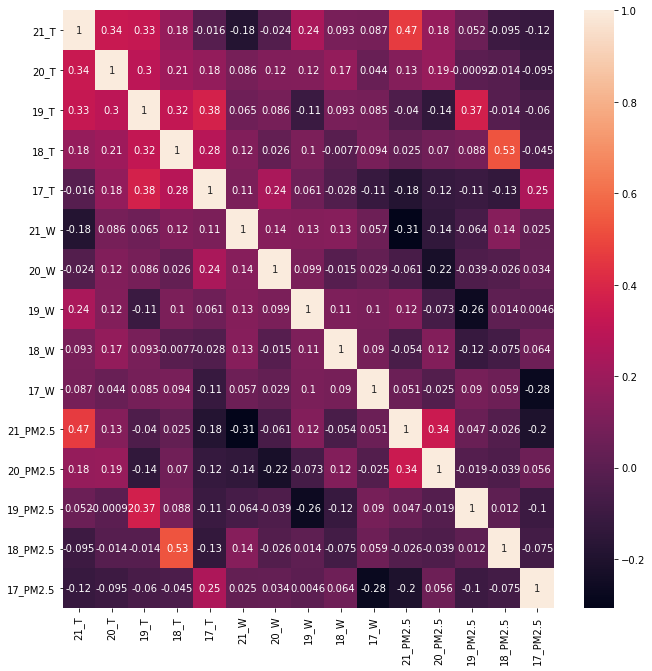

In [249]:
fig = plt.figure(figsize=(11,11))
sns.heatmap(twwd_fd.corr(), annot =True)

<AxesSubplot:>

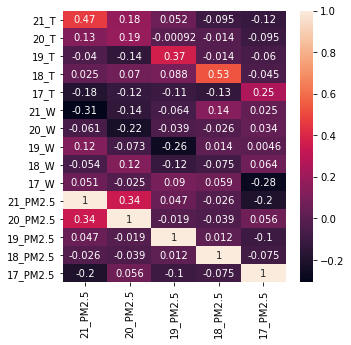

In [251]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(twwd_fd.corr()[['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5']], annot =True)

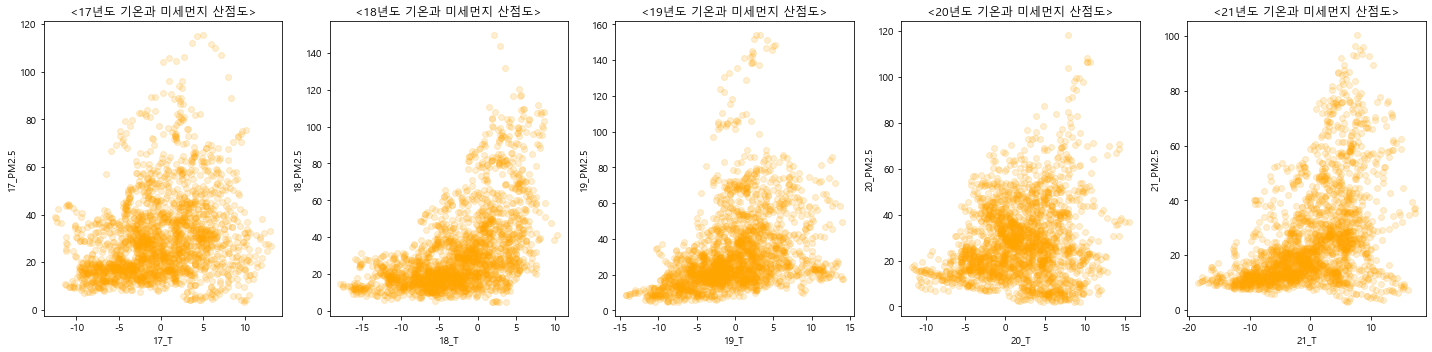

In [418]:
plt.figure(figsize=(20,5))

for i in range(1,5+1):

    plt.subplot(1, 5, i)
    plt.scatter(twwd_fd[f'{i+16}_T'], twwd_fd[f'{i+16}_PM2.5'], alpha = 0.18, c ='orange')
    plt.xlabel(f'{i+16}_T')
    plt.ylabel(f'{i+16}_PM2.5')
    plt.title(f'<{i+16}년도 기온과 미세먼지 산점도>')
plt.tight_layout()
plt.show()

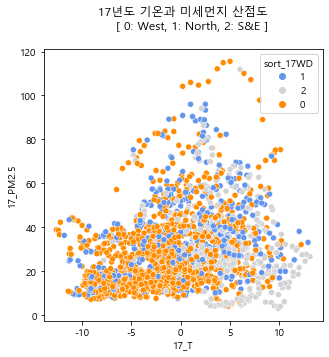

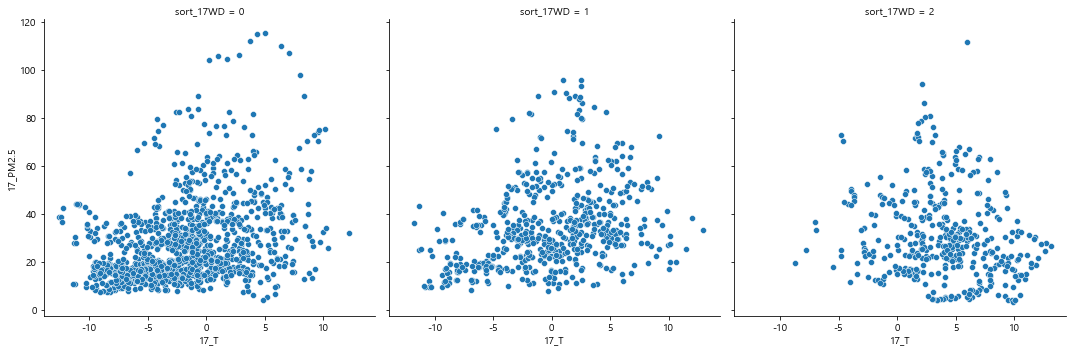

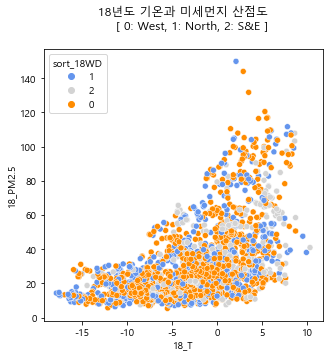

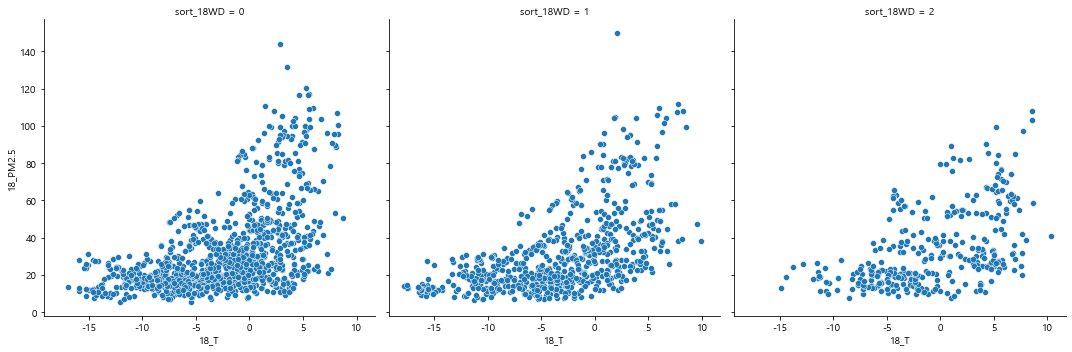

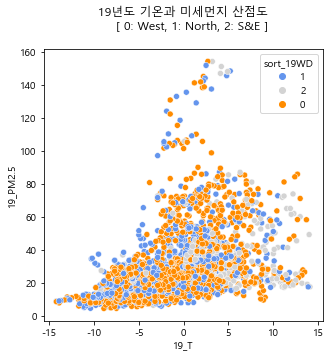

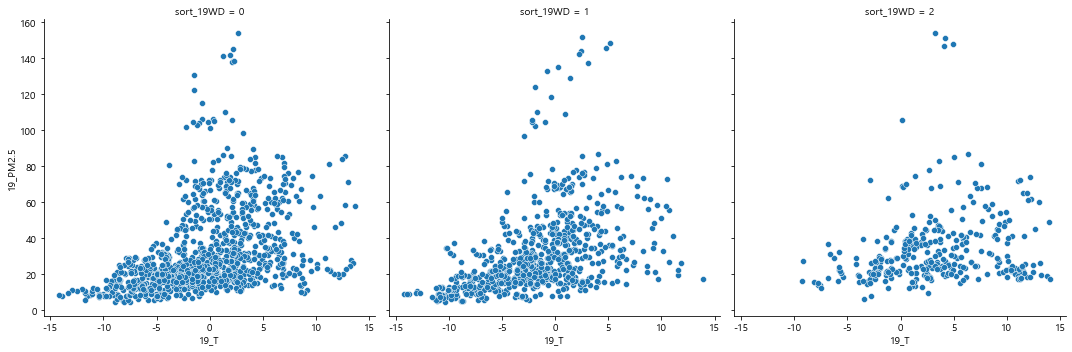

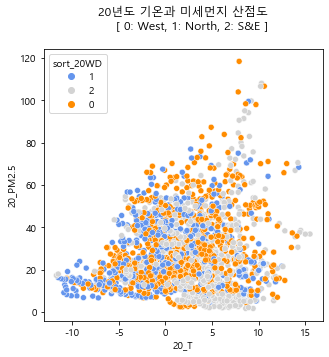

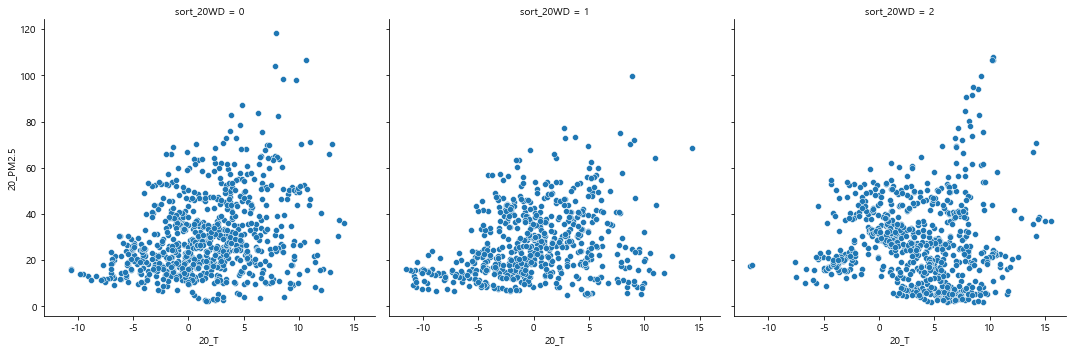

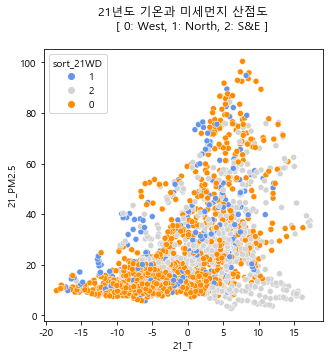

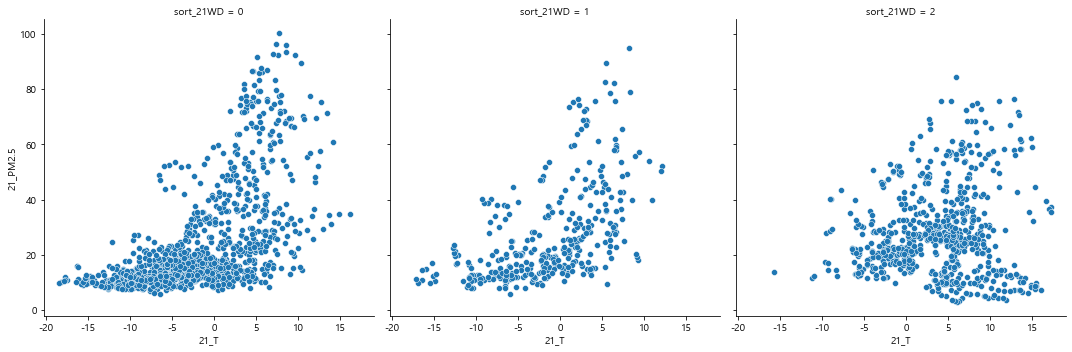

In [419]:
for i in range(1,5+1):
    plt.figure(figsize=(5,5))

    sns.scatterplot(x = f'{i+16}_T', y = f'{i+16}_PM2.5', data = twwd_fd, hue = f'sort_{i+16}WD', palette = {0:'darkorange', 1:'cornflowerblue', 2:'lightgray'})
    plt.title(f'''{i+16}년도 기온과 미세먼지 산점도
    [ 0: West, 1: North, 2: S&E ]
    ''')

    grid = sns.FacetGrid(data = twwd_fd, col = f'sort_{i+16}WD', col_order=[0,1,2], height = 5, aspect = 1, palette = { 0 : 'tab:orange', 1 :'cornflowerblue', 2 : 'lightgray'})
    grid.map(sns.scatterplot,f'{i+16}_T', f'{i+16}_PM2.5')

plt.show()

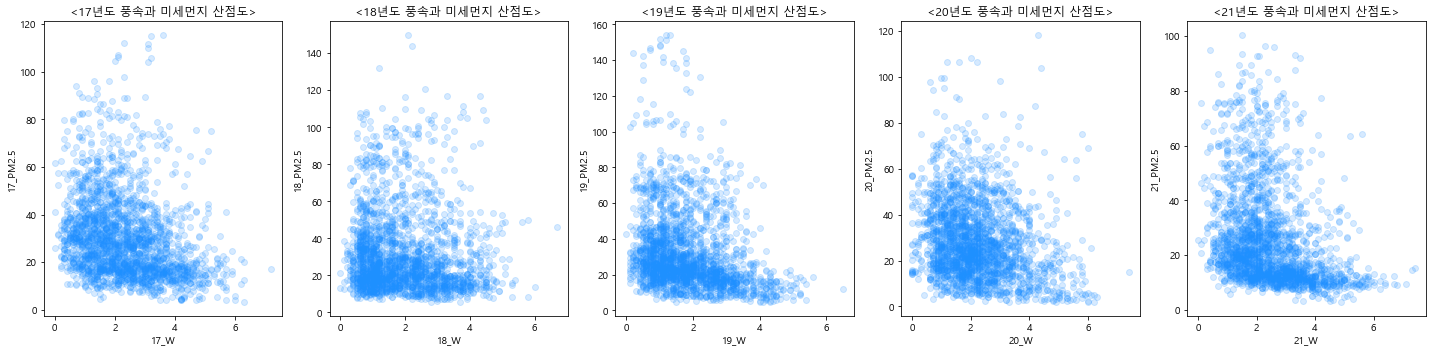

In [429]:
plt.figure(figsize=(20,5))

for i in range(1,5+1):

    plt.subplot(1, 5, i)
    plt.scatter(twwd_fd[f'{i+16}_W'], twwd_fd[f'{i+16}_PM2.5'], alpha = 0.18, c ='dodgerblue')
    plt.xlabel(f'{i+16}_W')
    plt.ylabel(f'{i+16}_PM2.5')
    plt.title(f'<{i+16}년도 풍속과 미세먼지 산점도>')
plt.tight_layout()
plt.show()

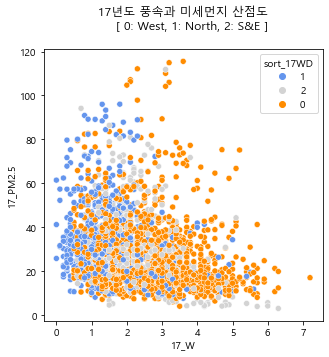

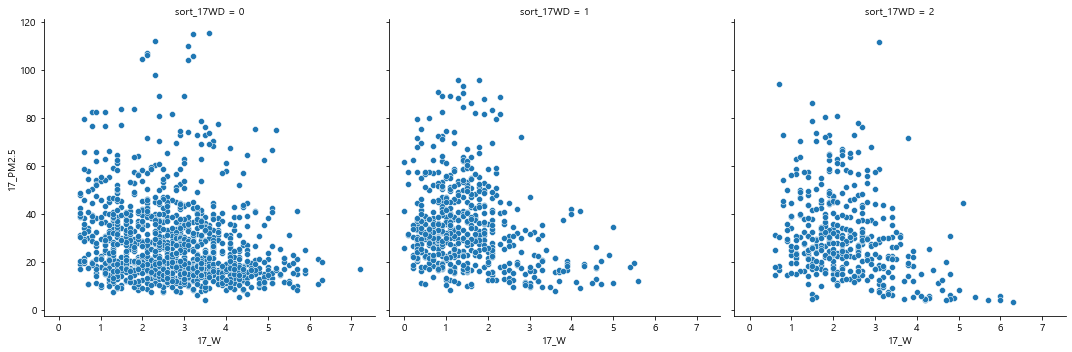

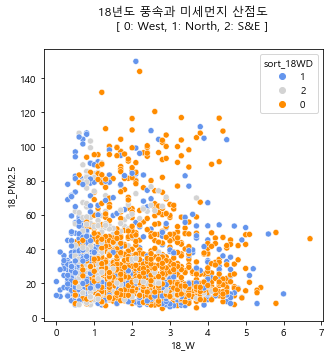

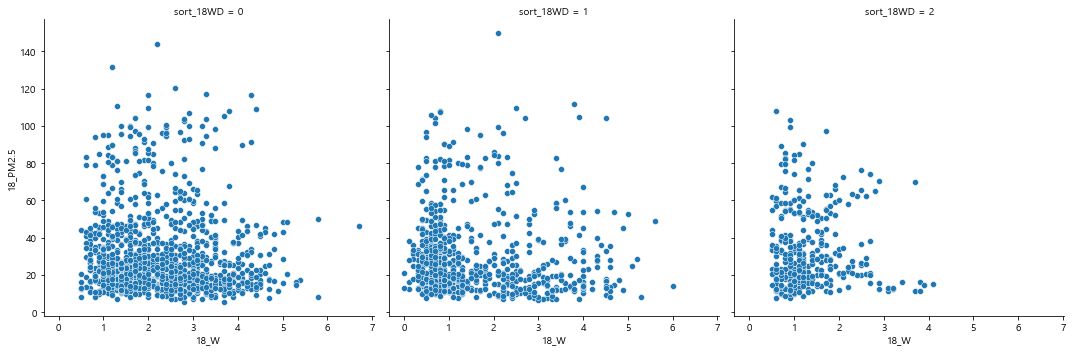

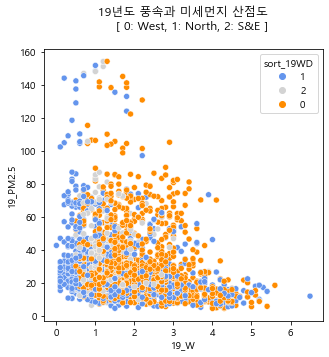

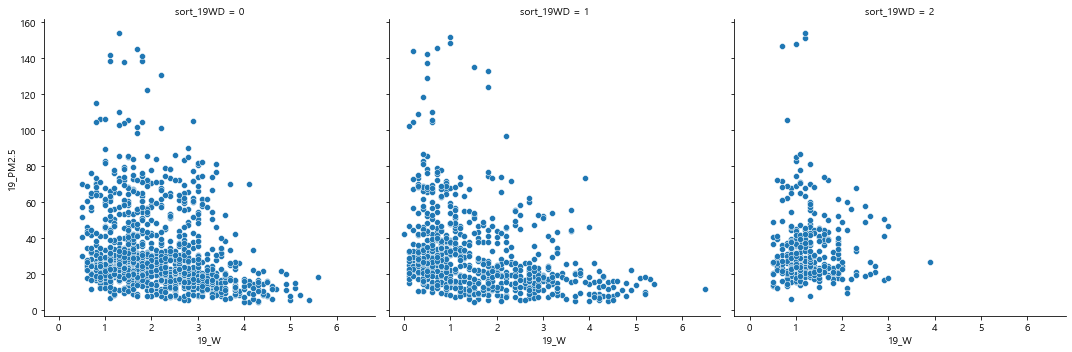

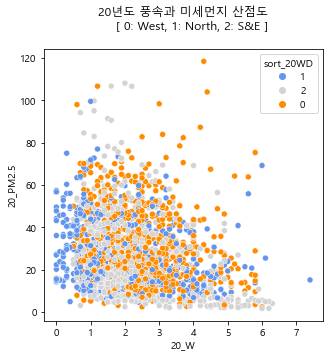

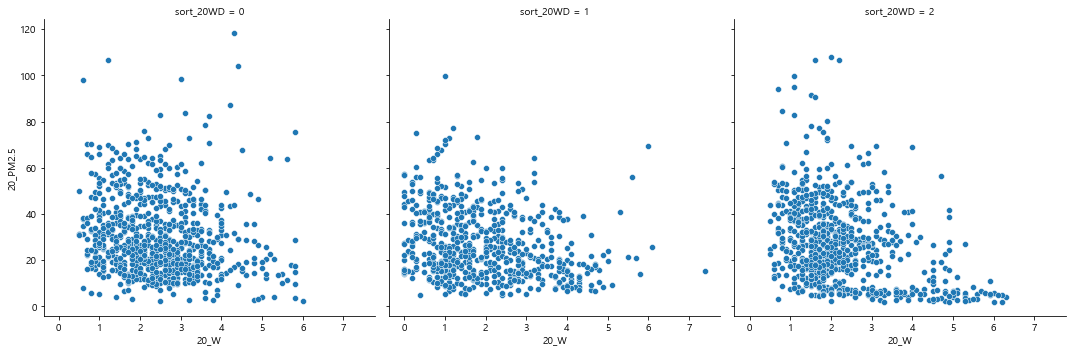

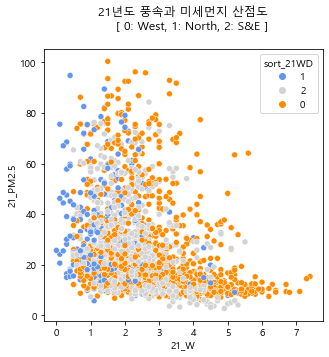

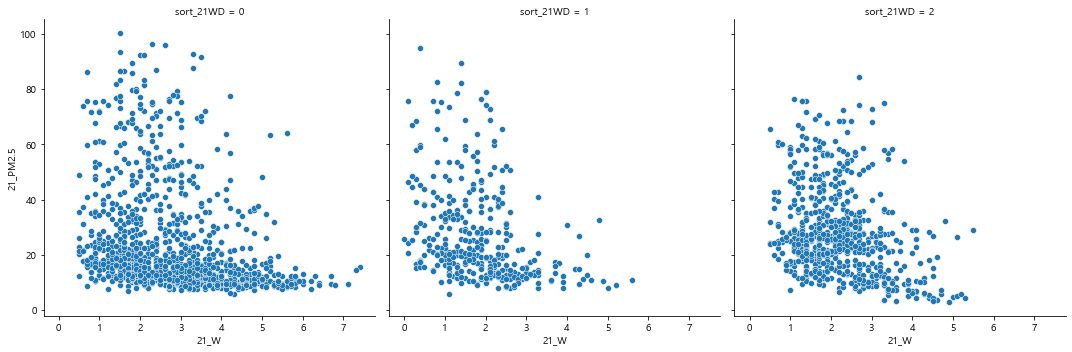

In [430]:
for i in range(1,5+1):
    plt.figure(figsize=(5,5))

    sns.scatterplot(x = f'{i+16}_W', y = f'{i+16}_PM2.5', data = twwd_fd, hue = f'sort_{i+16}WD', palette = {0:'darkorange', 1:'cornflowerblue', 2:'lightgray'})
    plt.title(f'''{i+16}년도 풍속과 미세먼지 산점도
    [ 0: West, 1: North, 2: S&E ]
    ''')

    grid = sns.FacetGrid(data = twwd_fd, col = f'sort_{i+16}WD', col_order=[0,1,2], height = 5, aspect = 1, palette = { 0 : 'tab:orange', 1 :'cornflowerblue', 2 : 'lightgray'})
    grid.map(sns.scatterplot,f'{i+16}_W', f'{i+16}_PM2.5')

plt.show()

In [ ]:
# 기온은 미세먼지 농도와 양의 상관성 : 추우면 깨끗한 경향, 온화하면 먼지 심화 경향
# 풍속은 미세먼지 농도와 음의 상관성 : 약풍이면 먼지 심화 경향, 강풍이면 먼지 확산 및 약화 경향

# Regression 모델 학습하기
> ## 다중 선형 회귀 모델링 분석
> > **기온과 풍속, 풍향의 요인에 대한 PM2.5 분석**

In [168]:
twwd_fd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0.0,0,1.0,1.0,0.0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0.0,1,2.0,1.0,0.0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0.0,1,1.0,1.0,0.0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0.0,2,1.0,1.0,0.0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0.0,1,1.0,0.0,0.0,19.375,20.333333,19.16,9.60,58.625000


In [169]:
twwd_fd.columns

Index(['21_T', '20_T', '19_T', '18_T', '17_T', '21_W', '20_W', '19_W', '18_W',
       '17_W', 'sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD',
       '21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'],
      dtype='object')

> > ### 결측이 가장많은 18년 자료를 기준으로, 모든 결측치 제거

In [170]:
twwd_fd_rg = twwd_fd[twwd_fd['18_W'].isna() == False]

> > ### 범주형 데이터 풍향을 get_dummies를 이용해 one-hot 벡터로 변경하기

In [180]:
twwd_fd_rg.iloc[:,10:14+1]

,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD
일시,,,,,
2019-12-01 01:00,0.0,0,1.0,1.0,0.0
2019-12-01 02:00,0.0,1,2.0,1.0,0.0
2019-12-01 03:00,0.0,1,1.0,1.0,0.0
2019-12-01 04:00,0.0,2,1.0,1.0,0.0
2019-12-01 05:00,0.0,1,1.0,0.0,0.0
...,...,...,...,...,...
2020-02-28 01:00,2.0,2,0.0,1.0,0.0
2020-02-28 02:00,2.0,2,0.0,1.0,0.0
2020-02-28 03:00,2.0,2,0.0,0.0,0.0


In [190]:
X_cat = pd.get_dummies(data = twwd_fd_rg.iloc[:,10:14+1], columns = ['sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD'])

> > ### StandardScaler를 이용해 수치형 데이터 표준화하기

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
# 5개년 각각 T, W 표준화

X_num = twwd_fd_rg.drop(['sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD'], axis =1)

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [526]:
# 평균 T, W의 표준화

# XX_num = twwd_fd_m[['T_m', 'W_m']]

# scaler = StandardScaler()
# scaler.fit(XX_num)
# XX_scaled = scaler.transform(XX_num)
# XX_scaled = pd.DataFrame(XX_scaled, index=XX_num.index, columns=XX_num.columns)

In [194]:
X_num = X_scaled.drop(['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'], axis =1)

X = pd.concat([X_num, X_cat], axis =1) # 결정계수 0.32
# XX = X_num # 풍속 변수를 제거하자, 결정계수 0.28로 감소
# XXX = pd.concat([XX_scaled, X_cat], axis =1) # 5개년 평균 낸 기온과 풍속 표준화한 값, 풍향을 X로, # 0.126으로 평균을 이용하니 성능이 반토막!
# XXXX = XX_scaled # 풍속까지 제거하니, 0.07로 또 반토막! 

y = twwd_fd_rg[['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5']] #종속변수 표준화 안 한 것 0.3189
# yy = X_scaled[['21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5']] #종속변수를 표준화한 것 0.3189, 차이 없음!
# yyy = twwd_fd_m['PM2.5_m'] # 5개년 평균 낸 미세먼지 농도 - XGboost일 때 사용!

> > ### 학습 데이터와 테스트 데이터 분리하기

In [195]:
# 풍속, 풍향, 기온 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

> > ### LinearRegression 모델 학습하기(다변량 : 풍속, 풍향, 기온)

In [196]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [197]:
y_predict = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

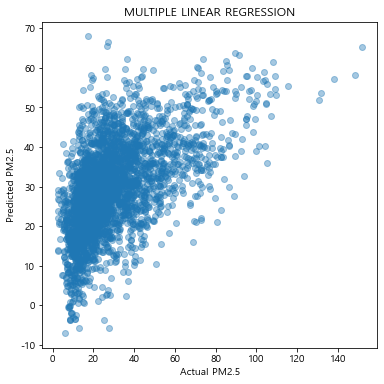

In [198]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_predict, alpha=0.4) #예측값 별 참값 사이 상관성 그래프
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

> > ### LinearRegression 모델 평가하기(다변량 : 풍속, 풍향, 기온)

In [222]:
#각각 연도별 기온과 미세먼지 농도 피어슨 상관계수

{'17_T_pearsonr' : round(np.corrcoef(X['17_T'], y['17_PM2.5'])[0,1], 3), '18_T_pearsonr' : round(np.corrcoef(X['18_T'], y['18_PM2.5'])[0,1], 3), 
 '19_T_pearsonr' : round(np.corrcoef(X['19_T'], y['19_PM2.5'])[0,1], 3), 
 '20_T_pearsonr' : round(np.corrcoef(X['20_T'], y['20_PM2.5'])[0,1], 3), '21_T_pearsonr' : round(np.corrcoef(X['21_T'], y['21_PM2.5'])[0,1], 3)}

{'17_T_pearsonr': 0.253,
 '18_T_pearsonr': 0.535,
 '19_T_pearsonr': 0.354,
 '20_T_pearsonr': 0.203,
 '21_T_pearsonr': 0.48}

In [224]:
#각각 연도별 기온과 미세먼지 농도 피어슨 상관계수

{'17_W_pearsonr' : round(np.corrcoef(X['17_W'], y['17_PM2.5'])[0,1], 3), '18_W_pearsonr' : round(np.corrcoef(X['18_W'], y['18_PM2.5'])[0,1], 3), 
 '19_W_pearsonr' : round(np.corrcoef(X['19_W'], y['19_PM2.5'])[0,1], 3), 
 '20_W_pearsonr' : round(np.corrcoef(X['20_W'], y['20_PM2.5'])[0,1], 3), '21_W_pearsonr' : round(np.corrcoef(X['21_W'], y['21_PM2.5'])[0,1], 3)}

{'17_W_pearsonr': -0.277,
 '18_W_pearsonr': -0.075,
 '19_W_pearsonr': -0.27,
 '20_W_pearsonr': -0.231,
 '21_W_pearsonr': -0.31}

In [199]:
print(mlr.score(X_train, y_train)) #결정계수 R^2 (얼마나 잘 예측하는지 척도)


#데이터를 5년치로 늘리고, 풍향 데이터를 독립변수에 추가한 결과, 결정계수가 상승하여, 0.22 -> 0.32

# 온도와 바람이 우리나라 겨울철 미세먼지 농도에 주요한 요인이라고는 하지만, 
# 여전히 국내 지표만을 고려했다는 점, 이 외에 수많은 변수들을 갖고 있다는 점에서 결정계수를 해석 

0.3189423912258464


> > ### 기온 단일 변수로 LinearRegression 모델 학습하기

In [631]:
# 기온 단일 변수는 얼마나 예측해낼까? 

X_T = X_num.drop(['21_W', '20_W', '19_W', '18_W','17_W'], axis =1)

In [632]:
# 기온 단일 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_T, y, test_size=0.3, random_state=1)

In [633]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_predict = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

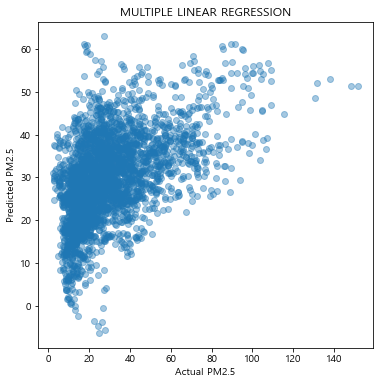

In [634]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_predict, alpha=0.4) #예측값 별 참값 사이 상관성 그래프
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [635]:
print(mlr.score(X_train, y_train))

# 결정 계수 0.229! 
# 기온만으로 도출한 결정 계수는 전체 변수의 결정 계수 비 72% 차지! (0.229/0.3189) * 100 = 72%

0.2292885070057428


> > ### 기온, 풍속, 미세먼지 5개년 평균값 구하기

In [508]:
# 기온, 풍속, 미세먼지 각각 5개년 데이터 평균으로 합치기 -> XGboost를 돌리려면, y값이 하나가 되어야 하므로.

# twwd_fd_m = pd.DataFrame(columns = ['T_m', 'W_m', 'PM2.5_m'])

# twwd_fd_m['T_m'] = (twwd_fd_rg['21_T']+twwd_fd_rg['20_T']+twwd_fd_rg['19_T']+twwd_fd_rg['18_T']+twwd_fd_rg['17_T']) / 5
# twwd_fd_m['W_m'] = (twwd_fd_rg['21_W']+twwd_fd_rg['20_W']+twwd_fd_rg['19_W']+twwd_fd_rg['18_W']+twwd_fd_rg['17_W']) / 5
# twwd_fd_m['PM2.5_m'] = (twwd_fd_rg['21_PM2.5']+twwd_fd_rg['20_PM2.5']+twwd_fd_rg['19_PM2.5']+twwd_fd_rg['18_PM2.5']+twwd_fd_rg['17_PM2.5']) / 5

In [509]:
twwd_fd_m.head()

,T_m,W_m,PM2.5_m
일시,,,
2019-12-01 01:00,1.36,1.34,19.338406
2019-12-01 02:00,0.96,1.32,20.092333
2019-12-01 03:00,0.76,1.36,21.917333
2019-12-01 04:00,0.70,1.74,24.225667
2019-12-01 05:00,0.62,1.48,25.418667


> ## XGBoost Regression 모델 학습하기

In [659]:
# 풍속, 풍향, 기온 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yyy, test_size=0.3, random_state=1)

In [637]:
from xgboost import XGBRegressor

In [638]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

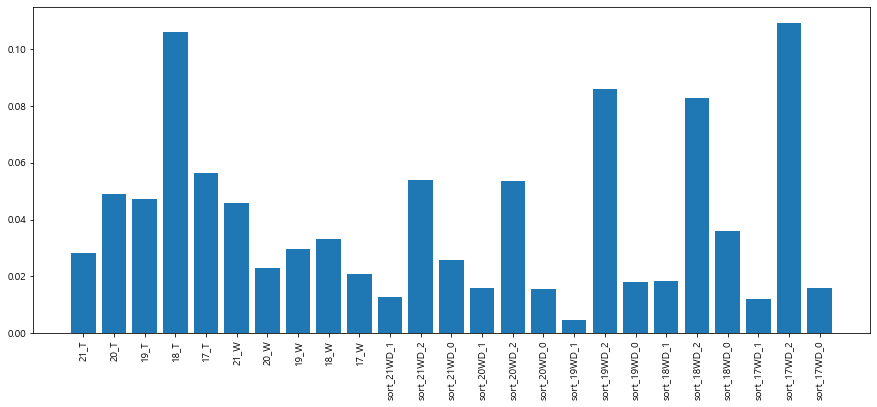

In [639]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 전반적으로 풍속, 풍향보다는 온도가 미세먼지 농도에는 더 중요한 요인!
# 특히 풍향에서는 2번, 즉 남동풍이 미세먼지 농도에 특히 중요한 요인으로 작용하고 있다! Why?

> > ### 모델 학습 결과 평가하기

In [640]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [641]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3.5876185235203577
4.7762204025967225


> > ### 실제 값과 추측 값의 Scatter plot 시각화하기

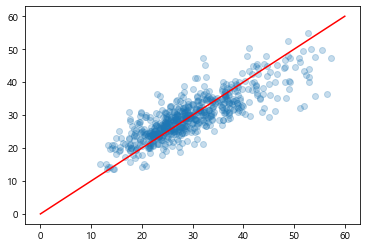

In [642]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.25)
plt.plot([0,60], [0,60], 'r-')
plt.show()

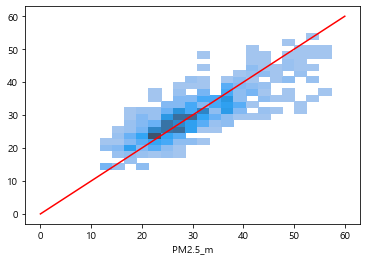

In [644]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60], [0, 60], 'r-')
plt.show()

> > ### 기온 단일 변수에 대한 PM2.5 예측

In [646]:
# 풍속, 풍향, 기온 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_T, yyy, test_size=0.3, random_state=1)

In [647]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

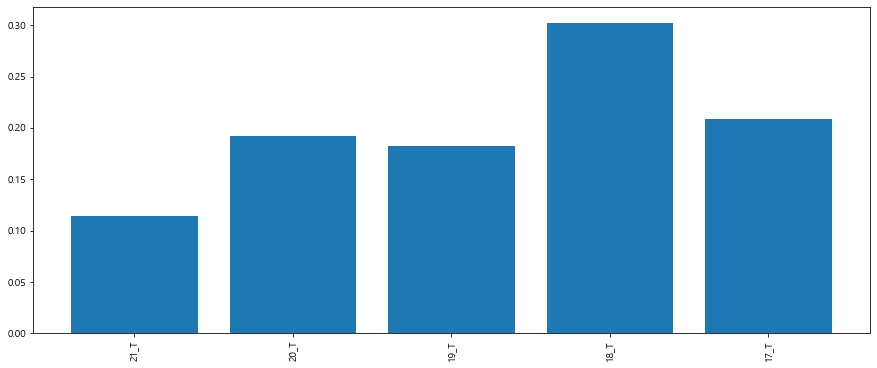

In [649]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 6))
plt.bar(X_T.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 풍속보다는 온도가 미세먼지 농도에는 더 중요 요인!
# 풍향에서는 2번, 즉 남동풍이 미세먼지 농도에 특히 중요 요인으로 작용했다! Why?

In [650]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

# 기온 변수는 얼마나 중요한 요인인가?
# 1. 평균 절대값 오차 비율 : (3.5876185235203577_ 다변량/3.7665423515427947_기온 단일 변수) *100 = 95.2 %
# 2. 평균 제곱 오차의 제곱근 비율 : (4.7762204025967225_다변량/5.2644534043837385_기온 단일 변수) * 100 = 90.7 %

3.7665423515427947
5.2644534043837385


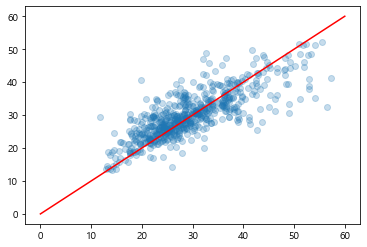

In [651]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.25)
plt.plot([0,60], [0,60], 'r-')
plt.show()

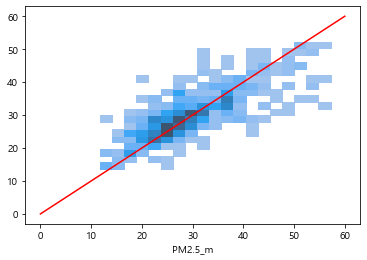

In [652]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60], [0, 60], 'r-')
plt.show()

----

# <결과 및 해석>

### 변수 간 시각화 해석
   - 기온은 미세먼지 농도와 **양의 상관성** : 추우면 깨끗한 경향, 온화하면 먼지 심화 경향 
   - 풍속은 미세먼지 농도와 **음의 상관성** : 약풍이면 먼지 심화 경향, 강풍이면 먼지 확산 및 약화 경향
   - 풍향 분류에서는 뚜렷한 관계성이 나타나지 않음
   - 서풍에서 기온과 미세먼지의 상관성 산점도 : 확실히 **기온이 따뜻할 때(서풍) 고농도의 띠**가 생긴다는 것을 포착할 수 있다.

#### 기온, 풍속의 피어슨 상관계수

``{'17_T_pearsonr': 0.253,
 '18_T_pearsonr': 0.535,
 '19_T_pearsonr': 0.354,
 '20_T_pearsonr': 0.203,
 '21_T_pearsonr': 0.48}``

``{'17_W_pearsonr': -0.277,
 '18_W_pearsonr': -0.075,
 '19_W_pearsonr': -0.27,
 '20_W_pearsonr': -0.231,
 '21_W_pearsonr': -0.31}``

### 모델 학습 결과 해석
   
   - 온도와 바람이 우리나라 겨울철 미세먼지 농도에 주요한 요인이라고는 하지만, **결정 계수가 0.32**에 그치고 말았다. 따라서, 여전히 미세먼지 농도를 결정하는 요인들에는 수없이 많은 종류의 것이 존재한다라는 것을 재확인했다.
   
   - 특히, 독립 변수로 **국내 서울시 관측값이 전부라는 것이 한계**이다. 그밖에도 중국의 미세먼지 농도와 서해상의 기온과 바람 요인 등 보다 더욱 직접적인 변수들이 고려되어야할 것이다.
    
   - 그러나, 풍속과 풍향 대비 **기온이 주요한 요인**이라는 것을 확인했다. 결정 계수의 비율과, 평균 절대값 오차와 평균 제곱 오차의 제곱근의 비율이 대체적으로 70%을 훌쩍 뛰어넘어, 큰 부분을 설명하고 있다는 것을 확인했다.    


**Q. 왜 풍향 중에서도 남동풍이 미세먼지 농도에 상대적으로 큰 영향을 미친다고 나왔을까?**
    
   - A. 헷갈리지 말자! **부호가 없는 상관성! 음의 상관성이다.** 실제로 남동풍은 강원도에서 팬 현상으로 인해 따뜻한 공기가 넘어온다. 그래서 높은 확률로 서울시 미세먼지를 **깨끗하게 하는 풍향의 바람**이다!

---

# (추가 분석) 북풍 서풍 따로 분류해서, 기온 풍속에 대한 미세먼지 농도

In [46]:
twwd_fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2179 entries, 2019-12-01 01:00 to 2020-03-01 00:00
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   21_T       2155 non-null   float64
 1   20_T       2179 non-null   float64
 2   19_T       2155 non-null   float64
 3   18_T       2155 non-null   float64
 4   17_T       2155 non-null   float64
 5   21_W       2158 non-null   float64
 6   20_W       2179 non-null   float64
 7   19_W       2158 non-null   float64
 8   18_W       2136 non-null   float64
 9   17_W       2160 non-null   float64
 10  sort_21WD  2158 non-null   float64
 11  sort_20WD  2179 non-null   int64  
 12  sort_19WD  2158 non-null   float64
 13  sort_18WD  2136 non-null   float64
 14  sort_17WD  2160 non-null   float64
 15  21_PM2.5   2155 non-null   float64
 16  20_PM2.5   2179 non-null   float64
 17  19_PM2.5   2155 non-null   float64
 18  18_PM2.5   2155 non-null   float64
 19  17_PM2.5   2155 non-null  

In [48]:
twwd_fd.head()

,21_T,20_T,19_T,18_T,17_T,21_W,20_W,19_W,18_W,17_W,sort_21WD,sort_20WD,sort_19WD,sort_18WD,sort_17WD,21_PM2.5,20_PM2.5,19_PM2.5,18_PM2.5,17_PM2.5
일시,,,,,,,,,,,,,,,,,,,,
2019-12-01 01:00,-1.4,5.1,1.9,-5.5,6.7,2.4,0.7,0.4,0.8,2.4,0.0,0,1.0,1.0,0.0,22.720,22.083333,18.28,11.00,22.608696
2019-12-01 02:00,-2.1,4.9,1.5,-6.0,6.5,1.6,0.0,1.0,1.0,3.0,0.0,1,2.0,1.0,0.0,21.520,20.250000,17.72,10.68,30.291667
2019-12-01 03:00,-2.2,4.6,1.2,-6.2,6.4,1.5,1.3,0.8,0.9,2.3,0.0,1,1.0,1.0,0.0,20.280,19.875000,18.88,10.76,39.791667
2019-12-01 04:00,-2.7,4.6,0.9,-6.0,6.7,1.3,1.0,1.2,2.3,2.9,0.0,2,1.0,1.0,0.0,19.120,19.541667,19.64,10.16,52.666667
2019-12-01 05:00,-3.2,4.8,1.2,-6.4,6.7,1.2,1.1,0.7,1.5,2.9,0.0,1,1.0,0.0,0.0,19.375,20.333333,19.16,9.60,58.625000


In [31]:
twwd_fd.columns

Index(['21_T', '20_T', '19_T', '18_T', '17_T', '21_W', '20_W', '19_W', '18_W',
       '17_W', 'sort_21WD', 'sort_20WD', 'sort_19WD', 'sort_18WD', 'sort_17WD',
       '21_PM2.5', '20_PM2.5', '19_PM2.5', '18_PM2.5', '17_PM2.5'],
      dtype='object')

In [71]:
# 연도별로 북풍끼리, 서풍끼리 기온, 풍속, 미세먼지 농도 묶어주기! #연도별 일 수 차이로 발생한 Nan 값 제거
# 기온과 풍향은 다중공선성 문제가 있으므로, 풍향을 제거하는 효과도 있다!

# for y in range(17,21+1):
twwd_fd_21 = twwd_fd[['21_T','21_W','sort_21WD','21_PM2.5']].set_index('sort_21WD').dropna()
twwd_fd_21_w = twwd_fd_21[twwd_fd_21.index == 0].rename(columns={'21_T': 'Temp', '21_W':'Wind','21_PM2.5':'PM2.5'})
twwd_fd_21_n = twwd_fd_21[twwd_fd_21.index == 1].rename(columns={'21_T': 'Temp', '21_W':'Wind','21_PM2.5':'PM2.5'})

In [72]:
twwd_fd_20 = twwd_fd[['20_T','20_W','sort_20WD','20_PM2.5']].set_index('sort_20WD').dropna()
twwd_fd_20_w = twwd_fd_20[twwd_fd_20.index == 0].rename(columns={'20_T': 'Temp', '20_W':'Wind','20_PM2.5':'PM2.5'})
twwd_fd_20_n = twwd_fd_20[twwd_fd_20.index == 1].rename(columns={'20_T': 'Temp', '20_W':'Wind','20_PM2.5':'PM2.5'})

In [73]:
twwd_fd_19 = twwd_fd[['19_T','19_W','sort_19WD','19_PM2.5']].set_index('sort_19WD').dropna()
twwd_fd_19_w = twwd_fd_19[twwd_fd_19.index == 0].rename(columns={'19_T': 'Temp', '19_W':'Wind','19_PM2.5':'PM2.5'})
twwd_fd_19_n = twwd_fd_19[twwd_fd_19.index == 1].rename(columns={'19_T': 'Temp', '19_W':'Wind','19_PM2.5':'PM2.5'})

In [74]:
twwd_fd_18 = twwd_fd[['18_T','18_W','sort_18WD','18_PM2.5']].set_index('sort_18WD').dropna()
twwd_fd_18_w = twwd_fd_18[twwd_fd_18.index == 0].rename(columns={'18_T': 'Temp', '18_W':'Wind','18_PM2.5':'PM2.5'})
twwd_fd_18_n = twwd_fd_18[twwd_fd_18.index == 1].rename(columns={'18_T': 'Temp', '18_W':'Wind','18_PM2.5':'PM2.5'})

In [75]:
twwd_fd_17 = twwd_fd[['17_T','17_W','sort_17WD','17_PM2.5']].set_index('sort_17WD').dropna()
twwd_fd_17_w = twwd_fd_17[twwd_fd_17.index == 0].rename(columns={'17_T': 'Temp', '17_W':'Wind','17_PM2.5':'PM2.5'})
twwd_fd_17_n = twwd_fd_17[twwd_fd_17.index == 1].rename(columns={'17_T': 'Temp', '17_W':'Wind','17_PM2.5':'PM2.5'})

In [78]:
twwd_fd_w = pd.concat([twwd_fd_17_w, twwd_fd_18_w, twwd_fd_19_w, twwd_fd_20_w, twwd_fd_21_w], axis = 0)
twwd_fd_n = pd.concat([twwd_fd_17_n, twwd_fd_18_n, twwd_fd_19_n, twwd_fd_20_n, twwd_fd_21_n], axis = 0)
# twwd_fd_17_w

# (추가 분석) Regression 모델 학습하기

## (서풍) 다중 선형 회귀 모델링 분석

### 서풍의 기온, 풍속과 미세먼지  농도 모델링

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
# 5개년 각각 T, W 표준화

X_num = twwd_fd_w

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [228]:
X_scaled.head()

,Temp,Wind,PM2.5
0.0,1.473416,-0.078336,-0.315638
0.0,1.436093,0.442900,0.070163
0.0,1.417431,-0.165209,0.547206
0.0,1.473416,0.356027,1.193725
0.0,1.473416,0.356027,1.492923


In [229]:
X = X_scaled[['Temp', 'Wind']]

y = X_scaled['PM2.5']

> > ### 학습 데이터와 테스트 데이터 분리하기

In [230]:
# 서풍의 기온, 풍속 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

> > ### LinearRegression 모델 학습하기(다변량 : 서풍의 기온, 풍속)

In [231]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [232]:
y_predict = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

> > ### LinearRegression 모델 평가 (다변량 : 서풍의 기온, 풍속)

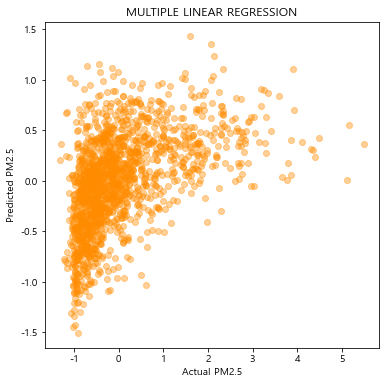

In [233]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_predict, alpha=0.4, c='darkorange') #예측값 별 참값 사이 상관성 그래프
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [234]:
# 서풍의 기온과 미세먼지 농도의 피어슨 상관 계수

# from scipy.stats.stats import pearsonr
# pearsonr(X['Temp'], y)[0]

round(np.corrcoef(X['Temp'], y)[0, 1], 3), round(np.corrcoef(X['Wind'], y)[0, 1], 3)

(0.443, -0.213)

In [236]:
print(round(mlr.score(X_train, y_train), 3)) #결정계수 R^2 (얼마나 잘 예측하는지 척도)


#데이터를 5년치로 늘리고, 풍향 데이터를 독립변수에 추가한 결과, 결정계수가 상승하여, 0.22 -> 0.32

# 온도와 바람이 우리나라 겨울철 미세먼지 농도에 주요한 요인이라고는 하지만, 
# 여전히 국내 지표만을 고려했다는 점, 이 외에 수많은 변수들을 갖고 있다는 점에서 결정계수를 해석 

0.222


## (서풍) XGBoost Regression 모델 학습하기

In [237]:
from xgboost import XGBRegressor

In [238]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

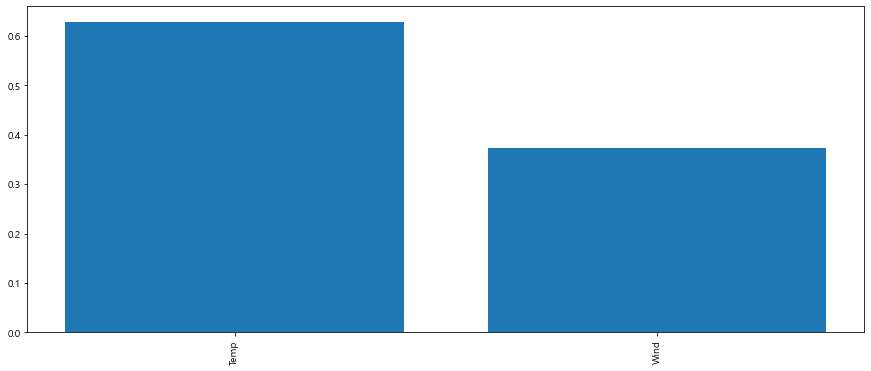

In [239]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 전반적으로 풍속, 풍향보다는 온도가 미세먼지 농도에는 더 중요한 요인!
# 특히 풍향에서는 2번, 즉 남동풍이 미세먼지 농도에 특히 중요한 요인으로 작용하고 있다! Why?

> > ### 모델 학습 결과 평가하기

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [241]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.679413717386995
0.977547779449429


> > ### 실제 값과 추측 값의 Scatter plot 시각화하기

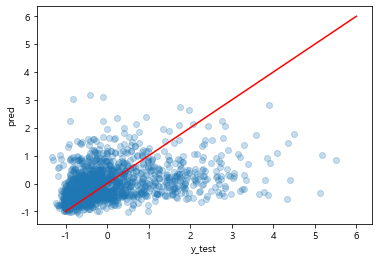

In [242]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.25)
plt.plot([-1,6], [-1,6], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

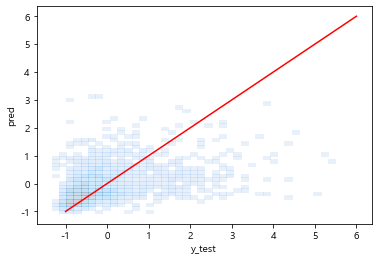

In [243]:
sns.histplot(x=y_test, y=pred, alpha=0.25)
plt.plot([-1,6], [-1,6], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

## (북풍) 다중 선형 회귀 모델링 분석

### 북풍의 기온, 풍속과 미세먼지  농도 모델링

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
# 5개년 각각 T, W 표준화

X_num = twwd_fd_n

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [246]:
X_scaled.head()

,Temp,Wind,PM2.5
1.0,1.398167,3.308217,-0.941909
1.0,0.652325,2.801642,-0.986124
1.0,0.484510,1.028629,-0.969190
1.0,0.372634,2.548354,-1.011562
1.0,0.279404,1.113058,-0.981960


In [247]:
X = X_scaled[['Temp', 'Wind']]

y = X_scaled['PM2.5']

> > ### 학습 데이터와 테스트 데이터 분리하기

In [248]:
# 서풍의 기온, 풍속 독립변수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

> > ### LinearRegression 모델 학습하기(다변량 : 서풍의 기온, 풍속)

In [249]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [250]:
y_predict = mlr.predict(X_test) #test 값을 넣어 예측 값 y_predict

> > ### LinearRegression 모델 평가 (다변량 : 서풍의 기온, 풍속)

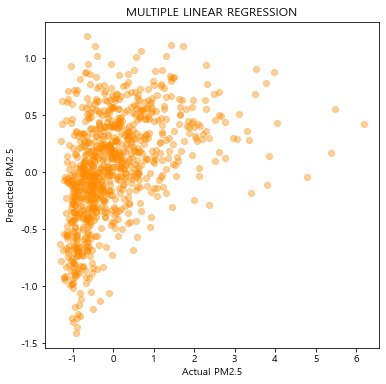

In [251]:
plt.figure(figsize=(6,6))

plt.scatter(y_test, y_predict, alpha=0.4, c='darkorange') #예측값 별 참값 사이 상관성 그래프
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [253]:
# 북풍의 기온과 미세먼지 농도의 피어슨 상관 계수

# from scipy.stats.stats import pearsonr
# pearsonr(X['Temp'], y)[0]

round(np.corrcoef(X['Temp'], y)[0, 1], 3), round(np.corrcoef(X['Wind'], y)[0, 1], 3)

(0.421, -0.245)

In [256]:
print(round(mlr.score(X_train, y_train), 3)) #결정계수 R^2 (얼마나 잘 예측하는지 척도)


#데이터를 5년치로 늘리고, 풍향 데이터를 독립변수에 추가한 결과, 결정계수가 상승하여, 0.22 -> 0.32

#북풍만, 혹은 서풍만으로는 0.32 -> 0.22

# 온도와 바람이 우리나라 겨울철 미세먼지 농도에 주요한 요인이라고는 하지만, 
# 여전히 국내 지표만을 고려했다는 점, 이 외에 수많은 변수들을 갖고 있다는 점에서 결정계수를 해석 

0.223


## (북풍) XGBoost Regression 모델 학습하기

In [257]:
from xgboost import XGBRegressor

In [258]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

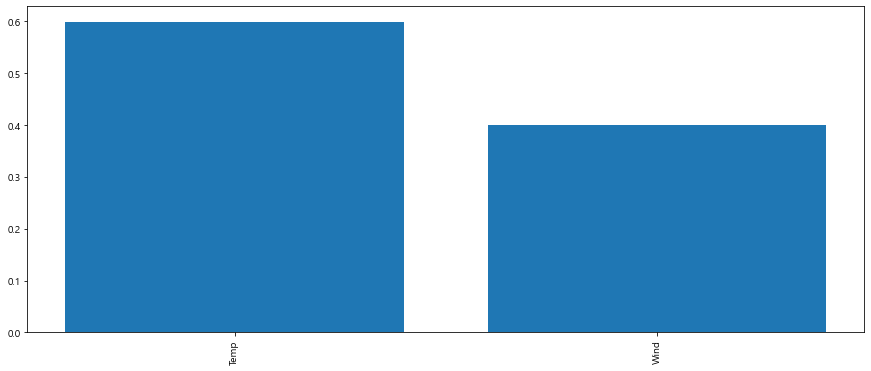

In [259]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15, 6))
plt.bar(X.columns, model_reg.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 전반적으로 풍속, 풍향보다는 온도가 미세먼지 농도에는 더 중요한 요인!
# 특히 풍향에서는 2번, 즉 남동풍이 미세먼지 농도에 특히 중요한 요인으로 작용하고 있다! Why?

> > ### 모델 학습 결과 평가하기

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [261]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.7027484771507934
1.0077358994354435


> > ### 실제 값과 추측 값의 Scatter plot 시각화하기

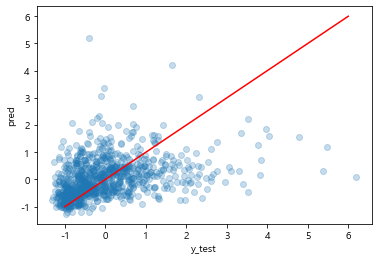

In [262]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.25)
plt.plot([-1,6], [-1,6], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

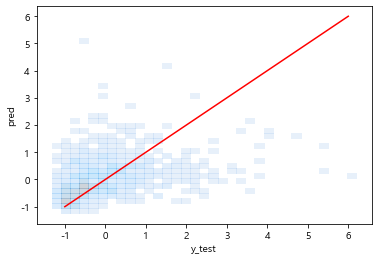

In [263]:
sns.histplot(x=y_test, y=pred, alpha=0.25)
plt.plot([-1,6], [-1,6], 'r-')
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

# <(추가 분석) 결과 및 해석>

### 변수 간 시각화 해석
   - 서풍의 기온과 풍속 **Pearson 상관계수** : (Temp: 0.443, Wind: -0.213, R^2: 0.222)
   - 북풍의 기온과 풍속 **Pearson 상관계수** : (Temp: 0.421, Wind: -0.245, R^2: 0.223)
   - 서풍과 북풍 사이에서 유의미한 관계성이 나타나지 않음

### 모델 학습 결과 해석
   
   - 위의 결과에서 풍향에 따른 차이가 없다라고 나온 점은 다음과 같은 사실들을 시사한다.
   
   1. 풍향이 서울시 관측소 기준 방향이다. 즉, 서쪽으로 중국에서 넘어오든, 북쪽에서 시베리아에서 넘어오든, 그 **경로 과정이 빠져있다는 한계점**이 있다.
   
   2. 서쪽의 중국 만큼 절대적이지는 않겠지만, **북쪽 또한 오염원**이 있다.
   
   3. **북쪽의 찬 공기**가 내려오면, 지면의 열 에너지에 좌우되는 **서울의 Boundary Layer가 함께 낮아진다.** 즉, 더 좁은 공간의 오염원의 밀도는 상대적으로 증가하게 되므로, 고농도의 결과가 나타날 수 있다.